# Plots of Dimension reduction on Wikipedia data

First we load the libraries and data ... I have saved off the dimension reduction results of the various algorithms.

In [1]:
import datamapplot
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'

wikipedia_data_map = np.load("Wikipedia-data_map.npy")
wikipedia_labels = np.load("Wikipedia-cluster_labels.npy", allow_pickle=True)
tsne_data_map = np.load("wikipedia_tsne_data_map.npy")
pca_data_map = np.load("wikipedia_pca_data_map.npy")
mds_data_map = np.load("wikipedia_mds_data_map.npy")
le_data_map = np.load("wikipedia_le_data_map.npy")
phate_data_map = np.load("wikipedia_phate_30nn_data_map.npy")

C:\Users\cyril\anaconda3\envs\persp\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


We want a consistent palette; here we are essentially reusing internal code in datamapplot to make a palette based on the UMAP embedding.

In [2]:
unique_non_noise_labels = [
    label for label in np.unique(wikipedia_labels) if label != "Unlabelled"
]
cluster_centers = np.asarray([
    wikipedia_data_map[wikipedia_labels == label].mean(axis=0)
    for label in unique_non_noise_labels
])
palette = datamapplot.palette_handling.palette_from_datamap(
    wikipedia_data_map,
    cluster_centers,
    hue_shift=0.0,
    radius_weight_power=1.0,
    min_lightness=15,
)
label_color_map = dict(zip(unique_non_noise_labels, palette))

We can try out Max's labelling strategy; I have struggled to figure out the quirks in matplotlib that result in this not working when writing to multiple axes, but I'll leave the one off plot here in case you wish the make several plots and then stitch together results in another program.

In [ ]:
fig, ax = datamapplot.create_plot(
    wikipedia_data_map,
    wikipedia_labels,
    title="UMAP Map of Wikipedia",
    sub_title="Paragraphs from articles on Simple Wikipedia embedded with Cohere embed",
    use_medoids=False,
    arrowprops={
        "arrowstyle": "wedge,tail_width=0.5,shrink_factor=0.15", 
        "linewidth": 0.4, "fc": "#33333377", "ec": "#333333aa"
    },
    font_family="Marcellus SC",
    label_linespacing=1.25,
    label_direction_bias=1.25,
    title_keywords={"fontsize":60},
    label_color_map=label_color_map,
#     label_base_radius=8.0,
    label_over_points=True,
    dynamic_label_size=True,
    min_font_size=8,
)
#fig.savefig("umap_pca-init_wikipedia_map.png")

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


Here's a simple layout as an example.

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
fig_, ax = datamapplot.create_plot(
    wikipedia_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="UMAP Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[0, 0],
)
fig_, ax = datamapplot.create_plot(
    tsne_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="t-SNE Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[0, 1],
)
fig_, ax = datamapplot.create_plot(
    le_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="Laplacian Eigenmaps Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[1, 0],
)
fig_, ax = datamapplot.create_plot(
    2000 * phate_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="PHATE Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[1, 1],
)
fig_, ax = datamapplot.create_plot(
    pca_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="PCA Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[2, 0],
)
fig_, ax = datamapplot.create_plot(
    mds_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="MDS Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=False,
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=axs[2, 1],
)
plt.tight_layout()
fig.savefig("wikipedia_all_6_figure.png")

Lastly we'll generate the plot in the layout that Dmitry suggested.

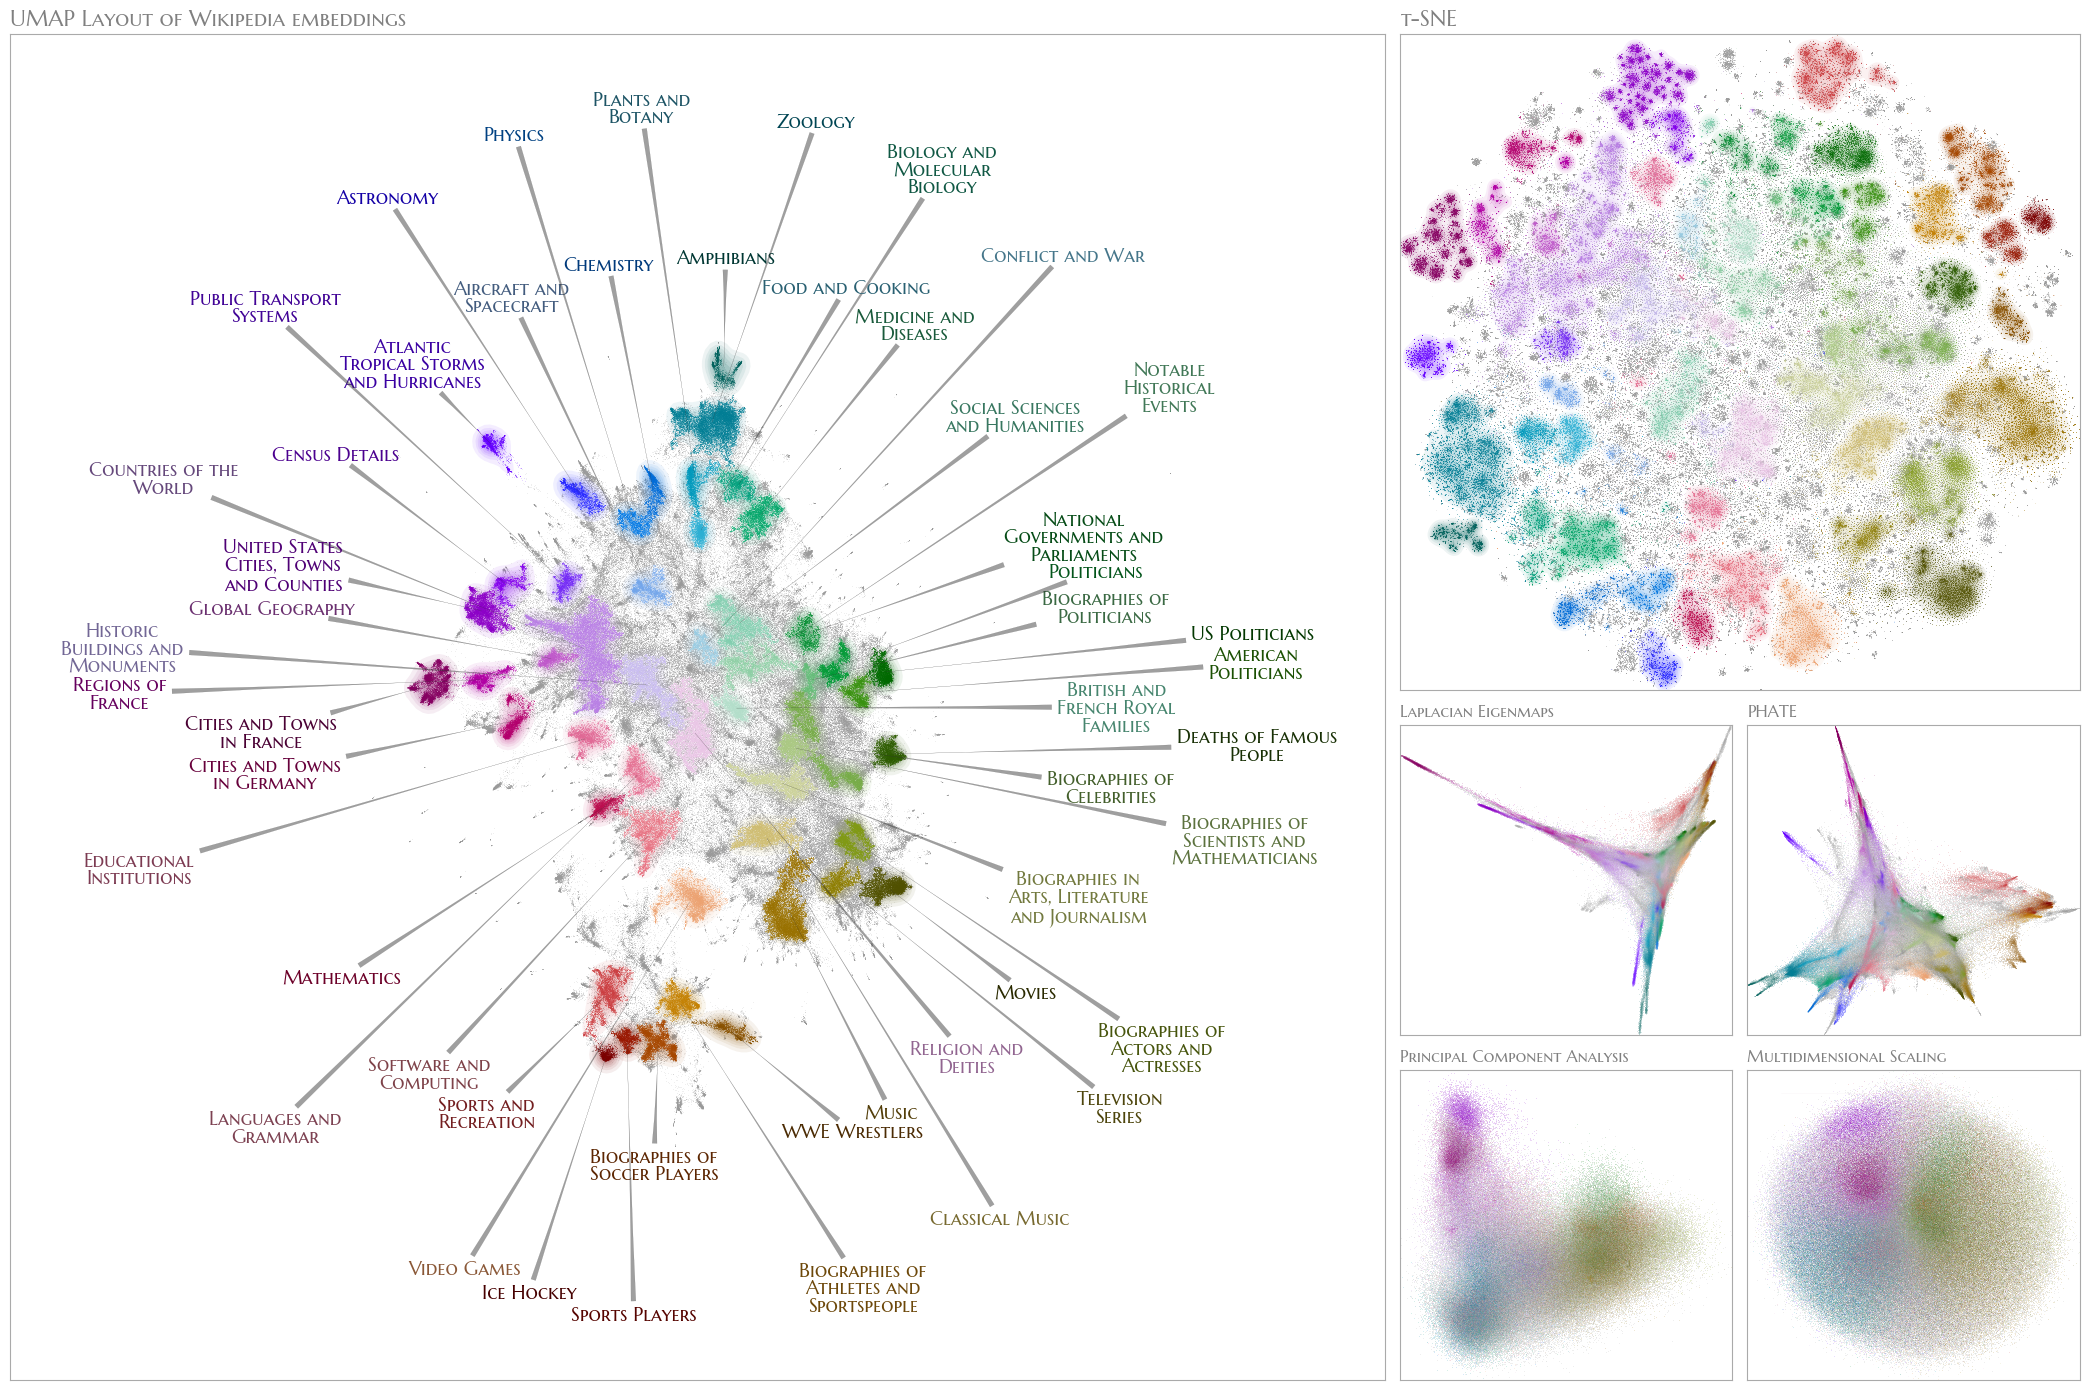

In [5]:
fig, ax_dict = plt.subplot_mosaic(
'''
AAAABB
AAAABB
AAAACD
AAAAEF
''',
figsize=(21,14),
dpi=100,
)
fig_, ax = datamapplot.create_plot(
    wikipedia_data_map,
    wikipedia_labels,
    use_medoids=False,
    arrowprops={
        "arrowstyle": "wedge,tail_width=0.25,shrink_factor=0.15", 
        "linewidth": 0.1, "fc": "#33333377", "ec": "#333333aa"
    },
    sub_title="UMAP Layout of Wikipedia embeddings",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    label_linespacing=1.25,
    label_direction_bias=1.25,
    title_keywords={"fontsize":60},
    label_color_map=label_color_map,
    glow_keywords={"kernel_bandwidth":0.2},
    label_base_radius=8.0,
    label_font_size=14,
    ax=ax_dict["A"]
)
fig_, ax = datamapplot.create_plot(
    tsne_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="t-SNE",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":16},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":2.5},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=ax_dict["B"],
)
fig_, ax = datamapplot.create_plot(
    le_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="Laplacian Eigenmaps",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-6},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=ax_dict["C"],
)
fig_, ax = datamapplot.create_plot(
    2000 * phate_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="PHATE",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":0.3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=ax_dict["D"],
)
fig_, ax = datamapplot.create_plot(
    pca_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="Principal Component Analysis",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=ax_dict["E"],
)
fig_, ax = datamapplot.create_plot(
    mds_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    sub_title="Multidimensional Scaling",
    font_family="Marcellus SC",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#ffffff00",
    label_base_radius=0.0,
    ax=ax_dict["F"],
)
plt.tight_layout()
fig.savefig("wikipedia_figure.png")